# Basic analysis
**ECON2125/6012 Lecture 3**\
Fedor Iskhakov

_(second part of lecture 3)_

```{admonition} Example
:class: tip

Let $F(x)$ be a profit function, so for solving profit maximization we have to solve $f(x)=0$ where $f(x)=F'(x)$.

Or: we want to solve an equation $g(x) = y$ for $x$, equivalently
$f(x) = g(x) - y$ 
```

```{figure} _static/plots/root.png
:name: root

Existence of a root
```

```{figure} _static/plots/no_root.png
:name: no_root

Non-existence of a root
```

One answer: a solution exists under certain conditions including continuity.

Questions:

- So how can I tell if $f$ is continuous?
- Can we weaken the continuity assumption?
- Does this work in multiple dimensions?
- When is the root unique?
- How can we compute it?

_These are typical problems in analysis_

## Real Numbers

Recall that $\mathbb{R}$ denotes the continuous real line

```{figure} _static/plots/real_line.png
:name: real_line
```

Can be thought of as $\mathbb{Q} \cup \mathbb I$ where 
%
- $\mathbb{Q}$ is the rational numbers
- $\mathbb I$ is the irrational numbers

```{admonition} Fact
:class: important

- Between any two real numbers $a < b$ there exists a rational
number 
- Between any two real numbers $a < b$ there exists an irrational
number
```

Thus, the rationals and irrationals are "all mixed together"

## Bounded sets

The ***absolute value*** of $x \in \mathbb{R}$ denoted $|x|$ is $|x| := \max\{x, -x\}$.

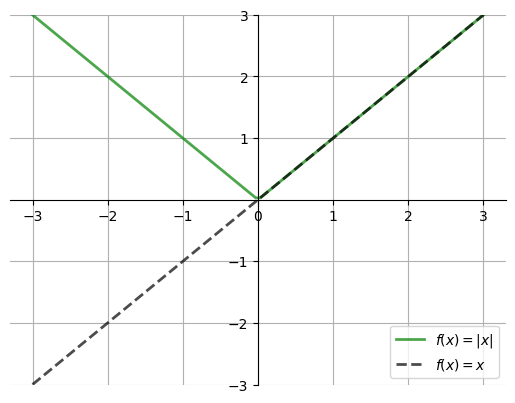

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def subplots():
    "Custom subplots with axes throught the origin"
    fig, ax = plt.subplots()

    # Set the axes through the origin
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_position('zero')
    for spine in ['right', 'top']:
        ax.spines[spine].set_color('none')
    
    ax.grid()
    return fig, ax

fig, ax = subplots()

ax.set_ylim(-3, 3)
ax.set_yticks((-3, -2, -1, 1, 2, 3))
x = np.linspace(-3, 3, 100)
ax.plot(x, np.abs(x), 'g-', lw=2, alpha=0.7, label=r'$f(x) = |x|$')
ax.plot(x, x, 'k--', lw=2, alpha=0.7, label=r'$f(x) = x$')
ax.legend(loc='lower right')

plt.show()

```{admonition} Fact
:class: important

For any $x, y \in \mathbb{R}$, the following statements hold

1. $|x| \leq y$ if and only if $-y \leq x \leq y$
2. $|x| < y$ if and only if $-y < x < y$
3. $|x| = 0$ if and only if $x=0$
4. $|xy| = |x| |y|$
9. $|x+y| \leq |x| + |y|$

Last inequality is called the ***triangle inequality*** 
```

**Exercise:** Using these rules, show that if $x, y, z \in \mathbb{R}$, then
%
1. $|x-y| \leq |x| + |y|$
2. $|x-y| \leq |x - z| + |z - y|$

(Hint: $x-y = x-z+z-y$)

$A \subset \mathbb{R}$ is called ***bounded*** if 
$\exists \; M \in \mathbb{R}$ s.t. $|x| \leq M$, all $x \in A$  

```{figure} _static/plots/bounded.png
:name: bounded
```

```{admonition} Example
:class: tip

Every finite subset $A$ of $\mathbb{R}$ is bounded
```

Set $M := \max \{  |a| : a \in A \}$

```{admonition} Example
:class: tip

$\mathbb{N}$ is unbounded
```

For any $M \in \mathbb{R}$ there is an $n$ that exceeds it

```{admonition} Example
:class: tip

$(a, b)$ is bounded for any $a$ and $b$
```

Each $x \in (a, b)$ satisfies $|x| \leq M := \max\{ |a|, |b| \}$

**Exercise:** Check it

```{admonition} Fact
:class: important

If $A$ and $B$ are bounded sets then so is $A \cup B$
```

**Proof:**  Let $A$ and $B$ be bounded sets and let $C := A \cup B$

By definition, $\exists \, M_A$ and $M_B$ with
%
$$
|a| \leq M_A, \text{ all } a \in A, 
\quad \quad
|b| \leq M_B, \text{ all } b \in B
$$

Let $M_C := \max\{M_A , M_B\}$ and fix any $x \in C$
%
$$
x \in C
\implies x \in A \text{ or } x \in B
$$
$$
\text{therefore } |x| \leq M_A \quad \text{or} \quad |x| \leq M_B
$$
%
$$
\text{therefore } |x| \leq M_C
$$

## Epsilon-balls ($\epsilon$-balls)

Given $\epsilon > 0$ and $a \in \mathbb{R}$, the ***$\epsilon$-ball*** 
around $a$ is

$$
B_{\epsilon}(a) 
:= \{ x \in \mathbb{R} : |a - x| < \epsilon \}
$$

Equivalently,
%
$$
B_\epsilon(a)
= \{ x \in \mathbb{R} :  a - \epsilon < x < a + \epsilon \}
$$

```{figure} _static/plots/eps_ball1D.png
:name: eps_ball1D
```

**Exercise:** Check equivalence

```{admonition} Fact
:class: important

If $x$ is in every $\epsilon$-ball around $a$ then $x=a$
```

**Proof:** 

Suppose to the contrary that 
%
- $x$ is in every $\epsilon$-ball around $a$ and yet $x \ne a$

Since $x$ is not $a$ we must have $|x-a| > 0$  

Set $\epsilon := |x-a|$  

Since $\epsilon > 0$, we have $x \in B_{\epsilon}(a)$

This means that $|x-a| < \epsilon$

That is, $|x - a| < |x - a|$ --- contradiction

```{admonition} Fact
:class: important

If $a \ne b$, then $\exists \; \epsilon > 0$ such that $B_{\epsilon}(a)$ and $B_{\epsilon}(b)$ are disjoint.
```

```{figure} _static/plots/disjnt_balls0.png
:name: disjnt_balls1
```

**Proof:** Let $a, b \in \mathbb{R}$ with $a \ne b$

If we set $\epsilon := |a-b|/2$, then $B_{\epsilon}(a)$ and
$B_\epsilon(b)$ are disjoint

To see this, suppose to the contrary that $\exists \, x \in B_{\epsilon}(a) \cap B_\epsilon(B)$ 

Then $ |x - a| < |a -b|/2$ and $|x - b| < |a -b|/2$

But then
%
$$
|a - b| \leq |a - x| + |x - b| < |a -b|/2 + |a -b|/2 = |a-b|
$$
%
Contradiction!

## Sequences

A ***sequence*** is a function from $\mathbb{N}$ to $\mathbb{R}$

- to each $n \in \mathbb{N}$ we associate one $x_n \in \mathbb{R}$

Typically written as $\{x_n\}_{n=1}^{\infty}$ or $\{x_n\}$ or $\{x_1, x_2, x_3, \ldots\}$

```{admonition} Example
:class: tip

- $\{x_n\} = \{2, 4, 6, \ldots \}$
- $\{x_n\} = \{1, 1/2, 1/4, \ldots \}$
- $\{x_n\} = \{1, -1, 1, -1, \ldots \}$
- $\{x_n\} = \{0, 0, 0, \ldots \}$
```

Sequence $\{x_n\}$ is called 

- ***bounded*** if $\{x_1, x_2, \ldots\}$ is a bounded set
- ***monotone increasing***  if $x_{n+1} \geq x_n$ for all $n$
- ***monotone decreasing***  if $x_{n+1} \leq x_n$ for all $n$
- ***monotone***  if it is either monotone increasing or monotone
decreasing

```{admonition} Example
:class: tip

- $x_n = 1/n$ is monotone decreasing, bounded
- $x_n = (-1)^n$ is not monotone but is bounded
- $x_n = 2n$ is monotone increasing but not bounded
```

## Convergence

Let $a \in \mathbb{R}$ and let $\{x_n\}$ be a sequence

Suppose, for any $\epsilon > 0$, we can find an $N \in \mathbb{N}$ such that
%
$$
x_n \in B_\epsilon(a) \text{ for all } n \geq N
$$

Then $\{x_n\}$ is said to ***converge*** to $a$

Convergence to $a$ in symbols,
%
$$
\forall \, \epsilon > 0, \;
\exists \, N \in \mathbb{N} \; 
\mathrm{ such that } n \geq \mathbb{N} \implies x_n \in B_{\epsilon}(a)
$$

The sequence $\{x_n\}$ is eventually in this $\epsilon$-ball around $a$

```{figure} _static/plots/convergent_seqs1.png
:name: convergent_seqs1
```

...and this one

%
```{figure} _static/plots/convergent_seqs2.png
:name: convergent_seqs2
```
...and this one

%
```{figure} _static/plots/convergent_seqs3.png
:name: convergent_seqs3
```
...and this one

%
```{figure} _static/plots/convergent_seqs4.png
:name: convergent_seqs4
```

The point $a$ is called the ***limit*** of the sequence, and we write
%
$$ 
x_n \to a \quad \text{as} \quad n \to \infty
$$
%
or
%
$$
\lim_{n \to \infty} x_n = a
$$

We call $\{ x_n \}$ ***convergent*** if it converges to some limit in
$\mathbb{R}$

```{admonition} Example
:class: tip

$\{x_n\}$ defined by $x_n = 1 + 1/n$ converges to $1$:
%
$$
x_n \to 1 \; \mathrm{as} \; n \to \infty
$$
$$
\lim_{n \to \infty} x_n = 1
$$

```

To prove this must show that $\forall \, \epsilon > 0$, there is an $N \in \mathbb{N}$ such that
%
```{math}
:label: eq_lim
n \geq N
\implies
|x_n - 1| < \epsilon
```
%

To show this formally we need to come up with an  "algorithm"

1. You give me any $\epsilon > 0$
9. I respond with an $N$ such that {eq}`eq_lim` holds

In general, as $\epsilon$ shrinks, $N$ will have to grow
Here's how to do this for the case $1 + 1/n$ converges to $1$

First pick an arbitrary $\epsilon > 0$  

Now we have to come up with an $N$ such that 
%
$$
n \geq N
\implies
|1 + 1/n - 1| < \epsilon
$$
%

Let $N$ be the first integer greater than $ 1/\epsilon$ 

Then 
%
$$
n \geq N 
\implies n > 1/\epsilon 
\implies 1/n < \epsilon 
\implies |1 + 1/n - 1| < \epsilon 
$$

Remark: Any $N' > N$ would also work

```{admonition} Example
:class: tip

The sequence $x_n = 2^{-n}$ converges to $0$ as $n \to \infty$
```

**Proof:** 
Must show that, $\forall \, \epsilon > 0$, $\exists \, N \in \mathbb{N}$ such that
%
```{math}
:label: eq:cc
n \geq N
\implies
|2^{-n} - 0| < \epsilon
```
%

So pick any $\epsilon > 0$, and observe that
%
$$
|2^{-n} - 0| < \epsilon
\; \iff \;
2^{-n}  < \epsilon
\; \iff \;
n > - \frac{\ln \epsilon}{\ln 2}
$$

Hence we take $N$ to be the first integer greater than $- \ln \epsilon /
\ln 2$

Then 
%
$$
n \geq N 
\implies n > -\frac{\ln \epsilon}{\ln 2}
\implies \text{ (2) }
$$

What if we want to show that $x_n \to a$ fails?

To show convergence fails we need to show the ***negation***
of
%
$$
\forall \,\; \epsilon > 0, \;\; 
\exists \,\; N \in \mathbb{N} \;\mathrm{such\;that}\; n \geq N
\implies x_n \in B_{\epsilon}(a)
$$

Negation: there is an $\epsilon > 0$ where we can't find any such $N$

More specifically, $\exists \, \epsilon > 0$ such that, which ever $N \in
\mathbb{N}$ we look at, there's an $n \geq N$ with $x_n$ outside $B_{\epsilon}(a)$

One way to say this: There exists a $B_\epsilon(a)$ such that $x_n \notin
B_\epsilon(a)$ infinitely often

This is the kind of picture we're thinking of

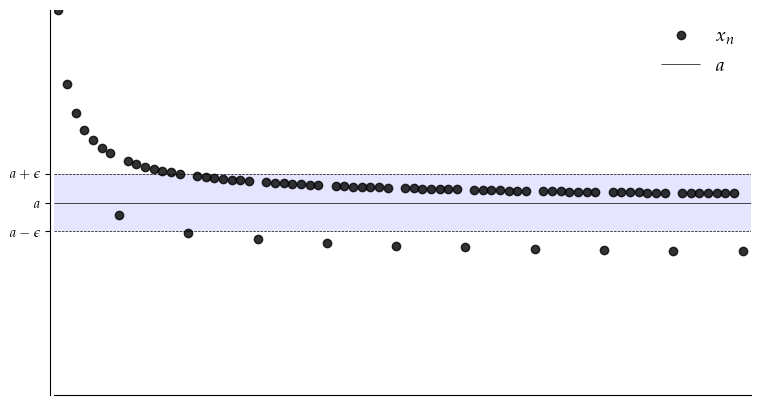

In [2]:
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import rc
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

N = 80
epsilon = 0.15
a = 1

def x(n):
    return 1 + 1/(n**(0.7)) - 0.3 * (n % 8 == 0)
def subplots(fs):
    "Custom subplots with axes throught the origin"
    fig, ax = plt.subplots(figsize=fs)
    # Set the axes through the origin
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_position('zero')
    for spine in ['right', 'top']:
        ax.spines[spine].set_color('none')
    return fig, ax

fig, ax = subplots((9, 5))  

xmin, xmax = 0.5, N+1
ax.set_xlim(xmin, xmax)
ax.set_ylim(0, 2)

n = np.arange(1, N+1)
ax.set_xticks([])
ax.plot(n, x(n), 'ko', label=r'$x_n$', alpha=0.8)

ax.hlines(a, xmin, xmax, color='k', lw=0.5, label='$a$')
ax.hlines([a - epsilon, a + epsilon], xmin, xmax, color='k', lw=0.5, linestyles='dashed')

ax.fill_between((xmin, xmax), a - epsilon, a + epsilon, facecolor='blue', alpha=0.1)

ax.set_yticks((a - epsilon, a, a + epsilon))
ax.set_yticklabels((r'$a - \epsilon$', r'$a$', r'$a + \epsilon$'))

ax.legend(loc='upper right', frameon=False, fontsize=14)
plt.show()

```{admonition} Example
:class: tip

The sequence $x_n = (-1)^n$ does ***not*** converge to 1 
```

**Proof:** This is what we want to show
%
$$
\exists \,\;  \epsilon > 0 \;\text{ such that } x_n \notin B_{\epsilon}(1)
\text{ infinitely often}
$$

Since it's a "there exists", we need to come up with such an $\epsilon$

Let's try $\epsilon = 0.5$, so that 
%
$$
B_\epsilon(1) = \{ x \in \mathbb{R} : |x - 1| < 0.5 \} = (0.5, 1.5 )
$$

If $n$ is odd then $x_n = -1$, which is not in $(0.5, 1.5)$

Hence $\{x_n\}$ not in $B_\epsilon(1)$ infinitely often

%

%The ``points'' $\infty$ and $-\infty$ can also be regarded as limits
%of sequences  

%We say that $x_n \to \infty$, or $\lim_n x_n = \infty$, if
%%
%$$
%\forall \, M \in \mathbb{N}, \; 
%\exists \, N \in \mathbb{N} \mathrm{such\;that} n \geq N \implies x_n \geq M 
%$$

%(However, in this case, $\{x_n\}$ is ***not*** called convergent)

%Example: $x_n := 2^n \to \infty$

%**Proof:** Fix $M \in \mathbb{N}$

%Let $N$ be any integer $\geq \log(M)/\log(2)$

%Then $n \geq N \implies n \geq \log(M)/\log(2) \implies 2^n \geq M$

%

## Properties of Limits

```{admonition} Fact
:class: important

Let $\{x_n\}$ be a sequence in $\mathbb{R}$ and let $a \in \mathbb{R}$.
Then 
%
$$
x_n \to a \iff |x_n - a| \to 0
$$
```

**Proof:** Compare the definitions:

- $x_n \to a$ $\iff$ $\forall \, \epsilon > 0$, $\exists \, N \in
\mathbb{N}$ s.t. $|x_n - a| < \epsilon$
- $|x_n - a| \to 0$ $\iff$ $\forall \, \epsilon > 0$, $\exists \, N \in
\mathbb{N}$ s.t. $||x_n - a| - 0| < \epsilon$

Clearly these statements are equivalent

```{admonition} Fact
:class: important

Each sequence in $\mathbb{R}$ has at most one limit
```

**Proof:** Suppose instead that $x_n \to a \text{ and } x_n \to b \text{ with } a \ne b $

Take disjoint $\epsilon$-balls around $a$ and $b$

```{figure} _static/plots/disjnt_balls0.png
:name: disjnt_balls2
```

Since $x_n \to a$ and $x_n \to b$, 
%
- $\exists \; N_a$ s.t. $n \geq N_a \implies x_n \in B_{\epsilon}(a)$ 
- $\exists \; N_b$ s.t. $n \geq N_b \implies x_n \in B_{\epsilon}(b)$

But then $n \geq \max\{N_a, N_b\} \implies $ $x_n \in B_{\epsilon}(a)$ and $x_n \in B_{\epsilon}(b)$  

Contradiction of disjoint

```{admonition} Fact
:class: important

Every convergent sequence is bounded
```

**Proof:** Let $\{x_n\}$ be convergent with $x_n \to a$

Fix any $\epsilon > 0$ and choose $N$ s.t. $x_n \in B_{\epsilon}(a)$ when
$n \geq N$

Regarded as sets, 
%
$$\{x_n\} \subset \{x_1, \ldots, x_{N-1}\} \cup B_{\epsilon}(a)$$

Both of these sets are bounded 

- First because finite sets are bounded
- Second because $B_{\epsilon}(a)$ is bounded

Moreover, finite unions of bounded sets are bounded

## Operations with limits

Here are some basic tools for working with limits

```{admonition} Fact
:class: important

If $x_n \to x$ and  $y_n \to y$, then 
%
1. $x_n + y_n \to x +  y$
2. $x_n y_n \to x y$
3. $x_n /y_n \to x / y$ when $y_n$ and $y$ are $\ne 0$
9. $x_n \leq y_n$ for all $n \implies x \leq y$
```

Let's check that $x_n \to x$ and $y_n \to y$ implies $x_n + y_n \to x +  y$

**Proof:** Fix $\epsilon > 0$

Need to find $N \in \mathbb{N}$ such that
%
```{math}
:label: eq_cb
n \geq N 
\; \implies \;
|(x_n + y_n) - (x + y)| < \epsilon
```

Note that 
%
- $|(x_n + y_n) - (x + y)| \leq |x_n - x| + |y_n - y|$  
- $\exists N_x \in \mathbb{N}$ such that $n \geq N_x \implies |x_n - x| < \epsilon/2$
- $\exists N_y \in \mathbb{N}$ such that $n \geq N_y \implies |y_n - y| < \epsilon/2$
%

**Exercise:** Show $N := \max\{N_x, N_y\}$ satisfies {eq}`eq_cb`
Let's also check the claim that $x_n \to x$,  $y_n \to y$  and 
$x_n \leq y_n$ for all $n \in \mathbb{N}$ implies $x \leq y$

**Proof:** Suppose instead that $x > y$

Take disjoint $\epsilon$-balls $B_\epsilon(x)$ and $B_\epsilon(y)$ around
these points

```{figure} _static/plots/disjnt_balls0.png
:name: disjnt_balls
```

Exists an $n$ such that $x_n \in B_\epsilon(x)$ and $y_n \in B_\epsilon(y)$

But then $x_n > y_n$, a contradiction

In words: "Weak inequalities are preserved under limits"

Here's another property of limits, called the "squeeze theorem"

```{admonition} Fact
:class: important

Let $\{x_n\}$ $\{y_n\}$ and $\{z_n\}$ be sequences in $\mathbb{R}$. If

%
1. $x_n \leq y_n \leq z_n$ for all $n \in \mathbb{N}$
9. $x_n \to a$ and $z_n \to a$
%
then $y_n \to a$ also holds
```

**Proof:** Pick any $\epsilon > 0$  

We can choose an 
%
- $N_x \in \mathbb{N}$ such that $n \geq N_x \implies x_n \in B_\epsilon(a)$
- $N_z \in \mathbb{N}$ such that $n \geq N_z \implies z_n \in B_\epsilon(a)$
%

**Exercise:** Show that $n \geq \max\{N_x, N_z\} \implies y_n \in B_\epsilon(a)$ 

## Infinite Sums

Let $\{x_n\}$ be a sequence in $\mathbb{R}$

Then 
%
$$
\sum_{n=1}^{\infty} x_n := \lim_{k\to \infty} \sum_{n=1}^k x_n  
$$

Thus, $\sum_{n=1}^{\infty} x_n$ is defined, if it exists, as the limit
of $\{y_k\}$ where
%
$$
y_k :=  \sum_{n=1}^k x_n  
$$

Other notation:
%
$$
\sum_n x_n, 
\quad \sum_{n \geq 1} x_n,
\quad \sum_{n \in \mathbb{N}} x_n,
\quad \text{etc.}
$$

```{admonition} Example
:class: tip

If $x_n = \alpha^n$ for $\alpha \in (0, 1)$, then
```
$$
\sum_{n=1}^{\infty} x_n 
= \lim_{k\to \infty} \sum_{n=1}^k \alpha^n
= \lim_{k\to \infty} \alpha \frac{1 - \alpha^k}{1 - \alpha}
=  \frac{\alpha}{1 - \alpha}
$$

```{admonition} Example
:class: tip

If $x_n = (-1)^n$ the limit fails to exist because
```
%
$$
y_k 
= \sum_{n=1}^k x_n
=
\begin{cases}
0 & \text{if $k$ is even}    
\\
-1 & \text{otherwise}
\end{cases}
$$

```{admonition} Fact
:class: important

If $\{x_n\}$ is nonnegative and $\sum_n x_n < \infty$, then $x_n \to 0$
```

**Proof:**  Suppose to the contrary that $x_n \to 0$ fails

Then  
$\exists \; \epsilon > 0$ such that $x_n \notin B_\epsilon(0)$ 
infinitely often

Since $x_n$ is nonnegative, 
$\exists \; \epsilon > 0$ such that $x_n$ exceeds $\epsilon$ infinitely often

But then $\sum_n x_n$ cannot be finite --- contradiction

## Cauchy Sequences

Informal definition: Cauchy sequences are those where $|x_n - x_{n+1}|$ gets smaller and smaller 

```{figure} _static/plots/cauchy.png
:name: cauchy
```

```{admonition} Example
:class: tip

Sequences generated by iterative methods for solving nonlinear equations often have this property
```

Cauchy sequences "look like" they are converging to something

A key ***axiom*** of analysis is that such sequences do converge to
something --- details follow

```{admonition} Definition
:class: important

A sequence $\{x_n\}$ is called ***Cauchy*** if 
$\forall \; \epsilon > 0, \;\; \exists \; N \in \mathbb{N}$ such that
%
$$
n \geq N 
\text{ and } \forall j \geq 1 \;\; 
\implies |x_n - x_{n+j}| < \epsilon
$$
```

```{admonition} Example
:class: tip

$\{x_n\}$ defined by $x_n = \alpha^n$ where $\alpha \in
(0, 1)$ is Cauchy
```

**Proof:** For any $n , j$ we have
%
$$
|x_n - x_{n+j}|
= |\alpha^n - \alpha^{n+j}| 
= \alpha^n |1 - \alpha^j|  \leq \alpha^n
$$

Fix $\epsilon > 0$

We can show that $n > \log(\epsilon) / \log(\alpha) \implies \alpha^n < \epsilon$ (**Exercise**)

Hence any integer $N > \log(\epsilon) / \log(\alpha)$ the sequence is Cauchy by definition.

```{admonition} Fact
:class: important

For any sequence, convergent $\iff$ Cauchy
```

Proof of $\implies$: 

Let $\{x_n\}$ be a sequence converging to some $a \in \mathbb{R}$

Fix $\epsilon > 0$

We can choose $N$ s.t. 
%
$$
n \geq N \;\; \implies \;\; |x_n - a | < \frac{\epsilon}{2} 
$$

For this $N$ we have $n \geq N$ and $j \geq 1$ implies
%
$$
|x_n - x_{n+j}|
\leq |x_n - a| + |x_{n+j} - a|
< \frac{\epsilon}{2} + \frac{\epsilon}{2} = \epsilon
$$

Proof of $\Leftarrow$:

This is basically an ***axiom*** in the definition of $\mathbb{R}$  

Either
%
1. We assume it, or
9. We assume something else that's essentially equivalent

Implications: 
%
- There are no "gaps" in the real line
- To check $\{x_n\}$ converges to something we just need to check Cauchy property

```{admonition} Fact
:class: important

Every bounded monotone sequence in $\mathbb{R}$ is convergent
```

Sketch of **Proof:**

Suffices to show that $\{x_n\}$ is Cauchy

Suppose not

Then no matter how far we go down the sequence we can find another jump
of size $\epsilon > 0$

Since monotone, all the jumps are in the same direction

But then $\{x_n\}$ not bounded --- a contradiction

Full **Proof:** See any text on analysis
## Subsequences

A sequence $\{x_{n_k} \}$ is called a ***subsequence*** of $\{x_n\}$ if 
%
1. $\{x_{n_k} \}$ is a subset of $\{x_n\}$
9. the indices $n_k$ are strictly increasing

```{admonition} Example
:class: tip

%
$$
\{x_n\} = \{x_1, x_2, x_3, x_4, x_5, \ldots\} 
$$
%
$$
\{x_{n_k}\} = \{x_2, x_4, x_6, x_8 \ldots\} 
$$
%
```

In this case
%
$$
\{n_k\} = \{n_1, n_2, n_3, \ldots\} = \{2, 4, 6, \ldots\}
$$

```{admonition} Example
:class: tip

$\{\frac{1}{1}, \frac{1}{3}, \frac{1}{5},\ldots\}$ is a
subsequence of $\{\frac{1}{1}, \frac{1}{2}, \frac{1}{3}, \ldots\}$

$\{\frac{1}{1}, \frac{1}{2}, \frac{1}{3},\ldots\}$ is a
subsequence of $\{\frac{1}{1}, \frac{1}{2}, \frac{1}{3}, \ldots\}$

$\{\frac{1}{2}, \frac{1}{2}, \frac{1}{2},\ldots\}$ is ***not*** a
subsequence of $\{\frac{1}{1}, \frac{1}{2}, \frac{1}{3}, \ldots\}$
 
```

```{admonition} Fact
:class: important

Every sequence has a monotone subsequence
```

**Proof:** Omitted

```{admonition} Example
:class: tip

The sequence $x_n = (-1)^n$ has monotone subsequence 
%
$$
\{x_2, x_4, x_6, \ldots \}
= \{1, 1, 1, \ldots \}
$$
```

This leads us to the famous ***Bolzano-Weierstrass theorem***,
to be used later when we discuss optimization.

```{admonition} Fact: Bolzano-Weierstrass theorem
:class: important

Every bounded sequence in $\mathbb{R}$ has a convergent subsequence
```

**Proof:**  Let $\{x_n\}$ be a bounded sequence

There exists a monotone subsequence

- which is itself a bounded sequence  (why?)
- and hence both monotone and bounded

Every bounded monotone sequence converges

Hence $\{x_n\}$ has a convergent subsequence

## Derivatives

Let $f \colon (a, b) \to \mathbb{R}$ and let $x \in (a, b)$

Let $H$ be all sequences $\{h_n\}$ such that 
$h_n \ne 0$ and $h_n \to 0$

If there exists a constant $f'(x)$ such that
%
$$
\frac{f(x + h_n) - f(x)}{h_n} \to f'(x)
$$
for every $\{h_n\} \in H$, then 

- $f$ is said to be ***differentiable*** at $x$
- $f'(x)$ is called the ***derivative*** of $f$ at $x$ 

```{figure} _static/plots/derivative.png
:name: derivative
```
```{admonition} Example
:class: tip

Let $f \colon \mathbb{R} \to \mathbb{R}$ be defined by $f(x) = x^2$
```

Fix any $x \in \mathbb{R}$ and any $h_n \to 0$ with $n \to \infty$

We have
%    
$$
\frac{f(x + h_n) - f(x)}{h_n} 
= \frac{(x + h_n)^2 - x^2}{h_n} =
$$
$$
= \frac{x^2 + 2xh_n + h_n^2 - x^2}{h_n}
= 2x + h_n
$$

$$
\text{therefore }
f'(x)
= \lim_{n \to \infty} (2x + h_n)
= 2x
$$

```{admonition} Example
:class: tip

Let $f \colon \mathbb{R} \to \mathbb{R}$ be defined by $f(x) = |x|$
```
This function is not differentiable at $x=0$

Indeed, if $h_n = 1/n$, then

$$
\frac{f(0 + h_n) - f(0)}{h_n} 
= \frac{|0 + 1/n| - |0|}{1/n} \to 1
$$

On the other hand, if $h_n = -1/n$, then

$$
\frac{f(0 + h_n) - f(0)}{h_n} 
= \frac{|0 - 1/n| - |0|}{-1/n} \to -1
$$

### Taylor series

Loosely speaking, if $f \colon \mathbb{R} \to \mathbb{R}$ is suitably
differentiable at $a$, then
%
$$
f(x) \approx f(a) + f'(a)(x-a) 
$$
%
for $x$ very close to $a$,
%
$$
f(x) \approx f(a) + f'(a)(x-a) + \frac{f''(a)}{2!}(x-a)^2 
$$
%
on a slightly wider interval, etc.

These are the 1st and 2nd order ***Taylor series approximations***
to $f$ at $a$ respectively

As the order goes higher we get better approximation

```{figure} _static/plots/taylor_4.png
:name: taylor_4

4th order Taylor series for $f(x) = \sin(x)/x$ at 0
```

```{figure} _static/plots/taylor_6.png
:name: taylor_6

6th order Taylor series for $f(x) = \sin(x)/x$ at 0
```

```{figure} _static/plots/taylor_8.png
:name: taylor_8

8th order Taylor series for $f(x) = \sin(x)/x$ at 0
```

```{figure} _static/plots/taylor_10.png
:name: taylor_10

10th order Taylor series for $f(x) = \sin(x)/x$ at 0
```


## Analysis in $\mathbb{R}^K$

Now we switch from studying points $x \in \mathbb{R}$ to vectors
${\bf x} \in \mathbb{R}^K$

- Replace distance $|x - y|$ with $\| {\bf x} - {\bf y} \|$

Many of the same results go through ***otherwise unchanged***

We state the analogous results briefly since 
%
- You already have the intuition from $\mathbb{R}$
- Similar arguments, just replacing $|\cdot|$ with $\| \cdot \|$

We'll spend longer on things that are different

### Norm and distance

The (Euclidean) ***norm*** of ${\bf x} \in \mathbb{R}^N$ is defined as
%
$$
\| {\bf x} \| 
:= \sqrt{{\bf x}' {\bf x} } 
= \left( \sum_{n=1}^N x_n^2 \right)^{1/2}
$$
%

Interpretation:
%
- $\| {\bf x} \|$ represents the _length_ of ${\bf x}$
- $\| {\bf x} - {\bf y} \|$ represents distance between ${\bf x}$ and ${\bf y}$


```{figure} _static/plots/vec.png
:name: vec

Length of red line $= \sqrt{x_1^2 + x_2^2} =: \|{\bf x}\|$
```

$\| {\bf x} - {\bf y} \|$ represents distance between ${\bf x}$ and ${\bf y}$

```{figure} _static/plots/vec_minus.png
:name: vec_minus

Length of red line $= \|{\bf x} - {\bf y}\|$
```

```{admonition} Fact
:class: important

For any $\alpha \in \mathbb{R}$ and any ${\bf x}, {\bf y} \in \mathbb{R}^N$, the following statements are true:
%
- $\| {\bf x} \| \geq 0$ and $\| {\bf x} \| = 0$ if and only if
${\bf x} = {\bf 0}$
- $\| \alpha {\bf x} \| = |\alpha| \| {\bf x} \|$
- $\| {\bf x} + {\bf y} \| \leq  \| {\bf x} \| + \| {\bf y} \|$
(***triangle inequality***)
- $| {\bf x}' {\bf y} | \leq  \| {\bf x} \| \| {\bf y} \|$
(***Cauchy-Schwarz inequality***)
%
```

For example, let's show that $\| {\bf x} \| = 0 \iff {\bf x} = {\bf 0}$

First let's assume that $\| {\bf x} \| = 0$ and show ${\bf x} = {\bf 0}$

Since $\| {\bf x} \| = 0$ we have $\| {\bf x} \|^2 = 0$ and hence
$\sum_{n=1}^N x^2_n = 0$

That is $x_n = 0$ for all $n$, or, equivalently, ${\bf x} = {\bf 0}$

Next let's assume that ${\bf x} = {\bf 0}$ and show $\| {\bf x} \| = 0$ 

This is immediate from the definition of the norm


### Bounded sets and $\epsilon$-balls

A set $A \subset \mathbb{R}^K$ called ***bounded*** if 
%
$$
\exists \, M \in \mathbb{R} 
\; \mathrm{such\;that} \;
\|{\bf x}\| \leq M, \quad \forall \; {\bf x} \in A
$$

Remarks:

- A ***generalization*** of the scalar definition 
- When $K=1$, the norm $\| \cdot \|$ reduces to $|\cdot|$

```{admonition} Fact
:class: important

If $A$ and $B$ are bounded sets then so is $C := A \cup B$
```

**Proof:**  Same as the scalar case --- just replace $|\cdot|$ with $\| \cdot \|$

**Exercise:** Check it

For $\epsilon > 0$, the $\epsilon$-ball $B_{\epsilon}({\bf a})$ around
${\bf a} \in \mathbb{R}^K$ is all ${\bf x} \in \mathbb{R}^K$ such that $\|{\bf a} - {\bf x}\|
< \epsilon$

```{figure} _static/plots/eps_ball2D.png
:name: eps_ball2D
:scale: 80%
```

```{admonition} Fact
:class: important

If ${\bf x}$ is in every $\epsilon$-ball around ${\bf a}$ then
${\bf x}={\bf a}$
```

```{admonition} Fact
:class: important

If ${\bf a} \ne {\bf b}$, then $\exists \, \epsilon > 0$ such that 
$B_\epsilon({\bf a}) \cap B_\epsilon({\bf b}) = \emptyset$
```

A ***sequence*** $\{{\bf x}_n\}$ in $\mathbb{R}^K$ is a function from $\mathbb{N}$ to $\mathbb{R}^K$

Sequence $\{{\bf x}_n\}$ is said to ***converge*** to ${\bf a} \in \mathbb{R}^K$ if
%
$$
\forall \epsilon > 0, 
\;
\exists \, N \in \mathbb{N}
\; 
\mathrm{such\;that}  n \geq \mathbb{N} \implies {\bf x}_n \in B_{\epsilon}({\bf a})
$$

We say: "$\{{\bf x}_n\}$ is eventually in any $\epsilon$-neighborhood of ${\bf a}$"

In this case ${\bf a}$ is called the ***limit*** of the sequence, and we write
%
$$ 
{\bf x}_n \to {\bf a} \; \text{ as } \; n \to \infty
\quad \text{or} \quad
\lim_{n \to \infty} {\bf x}_n = {\bf a}
$$
%

We call $\{ {\bf x}_n \}$ ***convergent*** if it converges to some limit in

$\mathbb{R}^K$
```{figure} _static/plots/convergence.png
:name: convergence
:scale: 80%
```

```{figure} _static/plots/convergence2.png
:name: convergence2
:scale: 80%
```

```{figure} _static/plots/convergence3.png
:name: convergence3
:scale: 80%
```

### Vector vs Componentwise Convergence

```{admonition} Fact
:class: important

A sequence $\{{\bf x}_n\}$ in $\mathbb{R}^K$ converges to ${\bf a} \in \mathbb{R}^K$
if and only if each component sequence converges in $\mathbb{R}$ 

That is,
$$
\begin{pmatrix}
x^1_n \\
\vdots \\
x^K_n 
\end{pmatrix}
\to
\begin{pmatrix}
a^1 \\
\vdots \\
a^K 
\end{pmatrix}
\quad \text{in } \mathbb{R}^K
\quad \iff \quad
\begin{array}{cc}
x^1_n \to a^1 &  \quad \text{in } \mathbb{R} \\
\vdots        &  \\
x^K_n \to a^K &  \quad \text{in } \mathbb{R} 
\end{array}
$$
%
% Equivalent:
% $$
% {\bf x}_n \to {\bf a} \; \text{ in } \mathbb{R}^K
% \quad \iff\quad  
% {\bf e}_k' {\bf x}_n \to {\bf e}_k' {\bf a} \text{ in $\mathbb{R}$ for all } k
$$
```

```{figure} _static/plots/norm_and_pointwise.png
:name: norm_and_pointwise
```

## From Scalar to Vector Analysis

More definitions analogous to scalar case:

A sequence $\{{\bf x}_n\}$ is called ***Cauchy*** if
% 
$$
\forall \; \epsilon > 0, \;\; \exists \; N \in \mathbb{N} 
\; \mathrm{such\;that}\;  n, m \geq N \implies \| {\bf x}_n - {\bf x}_m \| < \epsilon
$$

A sequence $\{{\bf x}_{n_k} \}$ is called a ***subsequence*** of $\{{\bf x}_n\}$ if 
%
1. $\{{\bf x}_{n_k} \}$ is a subset of $\{{\bf x}_n\}$
9. the indices $n_k$ are strictly increasing

```{admonition} Fact
:class: important

Analogous to the scalar case,

1. ${\bf x}_n \to {\bf a}$ in $\mathbb{R}^K$ if and only if $\|{\bf x}_n -
{\bf a}\| \to 0$ in $\mathbb{R}$
2. If ${\bf x}_n \to {\bf x}$ and ${\bf y}_n \to {\bf y}$ then ${\bf x}_n +
{\bf y}_n \to {\bf x} +  {\bf y}$
3. If ${\bf x}_n \to {\bf x}$ and $\alpha \in \mathbb{R}$ then $\alpha {\bf x}_n 
\to \alpha {\bf x}$
4. If ${\bf x}_n \to {\bf x}$ and ${\bf z} \in \mathbb{R}^K$ then ${\bf z}' {\bf x}_n 
\to {\bf z}' {\bf x}$
5. Each sequence in $\mathbb{R}^K$ has at most one limit
6. Every convergent sequence in $\mathbb{R}^K$ is bounded
7. Every convergent sequence in $\mathbb{R}^K$ is Cauchy
8. Every Cauchy sequence in $\mathbb{R}^K$ is convergent
%        %        9. Every bounded sequence in $\mathbb{R}^K$ has a convergent subsequence
```

**Exercise:** Adapt proofs given for the scalar case to these results

% - Except for the last one, which is a bit trickier

```{admonition} Example
:class: tip

Let's check that 
%
$$
{\bf x}_n \to {\bf a} \text{ in } \mathbb{R}^K
\; \iff \;
\|{\bf x}_n - {\bf a}\| \to 0 \text{ in } \mathbb{R}
$$
```

**Proof:**
- ${\bf x}_n \to {\bf a}$ in $\mathbb{R}^K$ means that
%
$$
\forall \, \epsilon > 0, 
\;
\exists \, N \in \mathbb{N}
\; \mathrm{such\;that}  \; 
n \geq \mathbb{N} \implies \| {\bf x}_n - {\bf a} \| < \epsilon
$$
- $\|{\bf x}_n - {\bf a}\| \to 0$ in $\mathbb{R}$ means that
%
$$
\forall\,  \epsilon > 0, 
\;
\exists \, N \in \mathbb{N}
\; \mathrm{such\;that}  \;
n \geq \mathbb{N} \implies | \| {\bf x}_n - {\bf a} \| - 0 | < \epsilon
$$

Obviously equivalent


Reminder --- these facts are more general than scalar ones!

- True for any finite $K$
- So true for $K = 1$ 
- This recovers the corresponding scalar fact

*You can forget the scalar fact if you remember the vector one*


```{admonition} Fact
:class: important

If $\{ {\bf x}_n \}$ converges to ${\bf x}$ in $\mathbb{R}^K$, then every
subsequence of $\{{\bf x}_n\}$ also converges to ${\bf x}$
```

```{figure} _static/plots/subseqconverg.png
:name: subseqconverg
:scale: 80%

Convergence of subsequences
```

### Infinite Sums in $\mathbb{R}^K$

Analogous to the scalar case, an infinite sum in $\mathbb{R}^K$ is the limit of
the partial sum:

- If $\{{\bf x}_n\}$ is a sequence in $\mathbb{R}^K$, then 
%
$$
\sum_{n=1}^{\infty} {\bf x}_n := \lim_{J\to \infty} \sum_{n=1}^J {\bf x}_n  
\text{ if the limit exists}
$$

In other words,
%
$$
{\bf y} = \sum_{n=1}^{\infty} {\bf x}_n 
\quad \iff \quad
\lim_{J \to \infty}
\;
\left\| \sum_{n=1}^J {\bf x}_n  - {\bf y} \right\|
\to 0
$$


## Open and Closed Sets

Let $G \subset \mathbb{R}^K$

We call ${\bf x} \in G$ ***interior*** to $G$ if 
$\exists \; \epsilon > 0$ with $B_\epsilon({\bf x}) \subset G$

Loosely speaking, interior means "not on the boundary"

```{figure} _static/plots/interior.png
:name: interior
```

```{admonition} Example
:class: tip

If $G = (a, b)$ for some $a < b$, then any $x \in (a, b)$ is interior 
```
```{figure} _static/plots/x_interior.png
:name: x_interior
```

**Proof:** Fix any $a < b$ and any $x \in (a, b)$

Let $\epsilon := \min\{x - a, b - x\}$

If $y \in B_\epsilon(x)$ then $y < b$ because 
%
$$
y 
= y + x - x
\leq |y - x| + x
< \epsilon + x 
\leq b - x + x = b
$$

**Exercise:** Show $y \in B_\epsilon(x) \implies y > a$

```{admonition} Example
:class: tip

If $G = [-1, 1]$, then $1$ is not interior 
```

```{figure} _static/plots/not_interior.png
:name: not_interior
```

Intuitively, any $\epsilon$-ball centered on $1$ will contain points $> 1$

More formally, pick any $\epsilon  > 0$ and consider $B_\epsilon(1)$

There exists a $y \in B_\epsilon(1)$ such that $y \notin [-1, 1]$

For example, consider the point $y := 1 + \epsilon/2$

**Exercise:** Check this point: lies in $B_\epsilon(1)$ but not in $[-1, 1]$

A set $G\subset \mathbb{R}^K$ is called ***open*** if all of its points are interior 

```{admonition} Example
:class: tip

Open sets:

- any "open" interval $(a,b) \subset \mathbb{R}$, since we showed all points are interior
- any "open" ball $B_\epsilon({\bf a}) = {\bf x} \in
\mathbb{R}^K : \|{\bf x} - {\bf a} \| < \epsilon$
- $\mathbb{R}^K$ itself
```

```{admonition} Example
:class: tip

Sets that are not open

- $(a,b]$ because $b$ is not interior 
- $[a,b)$ because $a$ is not interior 
```

### Closed Sets

A set $F \subset \mathbb{R}^K$ is called ***closed*** if every 
convergent sequence in $F$ converges to a point in $F$

Rephrased: If $\{{\bf x}_n\} \subset F$ and ${\bf x}_n \to {\bf x}$ for some
${\bf x} \in \mathbb{R}^K$, then ${\bf x} \in F$

```{admonition} Example
:class: tip

All of $\mathbb{R}^K$ is closed because every sequence converging to a point in $\mathbb{R}^K$ converges to a point in $\mathbb{R}^K$... right?
```

```{admonition} Example
:class: tip

If $(-1, 1) \subset \mathbb{R}$ is {\bf not} closed
```

**Proof:** True because
%
1. $x_n := 1-1/n$ is a sequence in $(-1, 1)$ converging to $1$,
9. and yet $1 \notin (-1, 1)$

```{admonition} Example
:class: tip

If $F = [a, b] \subset \mathbb{R}$ then $F$ is closed in $\mathbb{R}$
```

**Proof:** Take any sequence $\{x_n\}$ such that
%
- $x_n \in F$ for all $n$
- $x_n \to x$ for some $x \in \mathbb{R}$

We claim that $x \in F$

Recall that (weak) inequalities are preserved under limits:

- $x_n \leq b$ for all $n$ and $x_n \to x$, so $x \leq b$
- $x_n \geq a$ for all $n$ and $x_n \to x$, so $x \geq a$
%
therefore $x \in [a, b] =: F$

```{admonition} Example
:class: tip

Any "hyperplane" of the form 
%
$$
H = \{ {\bf x} \in \mathbb{R}^K : {\bf x}' {\bf a} = c \}
$$ 
is closed 
```

**Proof:** Fix ${\bf a} \in \mathbb{R}^K$ and $c \in \mathbb{R}$ and let $H$ be as above

Let $\{{\bf x}_n\} \subset H$ with ${\bf x}_n \to {\bf x} \in \mathbb{R}^K$

We claim that ${\bf x} \in H$

Since ${\bf x}_n \in H$ and ${\bf x}_n \to {\bf x}$ we have 
$$
{\bf x}_n ' {\bf a} \to {\bf x}' {\bf a} \text{ in } \mathbb{R}
\quad \text{and} \quad
{\bf x}_n' {\bf a} = c \text{ for all } n
$$
$$
\text{therefore } 
{\bf x}' {\bf a} = \lim_{n} {\bf x}_n' {\bf a} 
= \lim_n c
= c
$$
$$
\text{therefore } 
{\bf x} \in H
$$

## Properties of Open and Closed Sets

```{admonition} Fact
:class: important

$G \subset \mathbb{R}^K$ is open $\iff \; G^c$ is closed
```

**Proof:** Let's just check $\implies$ 

Pick any $G$ and let $F := G^c$

Suppose to the contrary that $G$ is open but $F$ is not closed, so 
%
$\exists$ a sequence $\{{\bf x}_n\} \subset F$ with limit ${\bf x} \notin F$ 

Then ${\bf x} \in G$, and since $G$ open, $\exists \, \epsilon > 0$ such
that $B_\epsilon({\bf x}) \subset G$

Since ${\bf x}_n \to {\bf x}$ we can choose an $N \in \mathbb{N}$ with ${\bf x}_N \in
B_\epsilon({\bf x})$

This contradicts ${\bf x}_n \in F$ for all $n$

%Next let's prove that $F$ close implies $G := F^c$ open

%Pick any closed $F$ and let $G := F^c$

%Suppose to the contrary that $G$ is not open

%Then exists some non-interior ${\bf x} \in G$

%Since non-interior, no neigborhood of ${\bf x}$ lies entirely in $G$

%Thus, for each $n \in \mathbb{N}$, the ball $B_{1/n}({\bf x})$ is not contained in $G$

%In other words, $B_{1/n}({\bf x})$ contains some point ${\bf x}_n$ of $F$

%For this sequence we have $\{{\bf x}_n\} \subset F$ and ${\bf x}_n \to {\bf x}$ 

%But ${\bf x} \in F^c$, a contradiction

%```{admonition} Example
%:class: tip

%Any singleton $\{ {\bf x} \} \subset \mathbb{R}^K$ is closed
%```
%
%Let's prove this by showing that $\{{\bf x}\}^c$ is open

%Pick any ${\bf y} \in \{{\bf x}\}^c$

%We claim that ${\bf y}$ is interior to $\{{\bf x}\}^c$

%Since ${\bf y} \in \{{\bf x}\}^c$ it must be that ${\bf y} \ne {\bf x}$

%Therefore, exists $\epsilon > 0$ such that $B_\epsilon({\bf y}) \cap B_\epsilon({\bf x}) = \emptyset$

%In particular, ${\bf x} \notin B_\epsilon({\bf y})$, and hence $B_\epsilon({\bf y}) \subset \{{\bf x}\}^c$

%Therefore ${\bf y}$ is interior as claimed

%Since ${\bf y}$ was arbitrary follows that $\{{\bf x}\}^c$ is open and $\{{\bf x}\}$ is closed


```{admonition} Fact
:class: important

1. Any union of open sets is open
9. Any intersection of closed sets is closed
```

***Proof of first fact:***

Let $G := \cup_{\lambda \in \Lambda} G_\lambda$, where each $G_\lambda$ is
open

We claim that any given ${\bf x} \in G$ is interior to $G$

Pick any ${\bf x} \in G$

By definition, ${\bf x} \in G_\lambda$ for some $\lambda$

Since $G_\lambda$ is open, $\exists \, \epsilon > 0$ such that $B_\epsilon({\bf x})
\subset G_\lambda$

But $G_\lambda \subset G$, so $B_\epsilon({\bf x}) \subset G$ also holds

In other words, ${\bf x}$ is interior to $G$ 

%Be careful:  

%\begin{itemize}
%- An {\bf infinite} intersection of open sets is not necessarily open
%- An {\bf infinite} union of closed sets is not necessarily closed

%For example, if $G_n := (-1/n, 1/n)$,  then $\cap_{n \in \mathbb{N}} G_n = \{0\} $  

%To see this, suppose that $x \in \cap_n G_n$

%Then
%%
%$$
%-1/n < x < 1/n, \quad \forall n \in \mathbb{N}
%$$
%%

%Therefore $x = 0$, and hence $x \in \{0\}$  

%On the other hand, if $x \in \{0\}$ then $x \in \cap_n G_n$

%```{admonition} Fact
% :class: important
%
%If $A$ is closed and bounded then every sequence in
%``` 
%$A$ has a subsequence which converges to a point of $A$

%
%**Proof:** Take any sequence $\{{\bf x}_n\}$ contained in $A$

%Since $A$ is bounded, $\{{\bf x}_n\}$ is bounded

%Therefore it has a convergent subsequence

%Since 
%%
%\begin{itemize}
%- the subsequence is also contained in $A$, 
%%- $A$ is closed
%

%the limit must lie in $A$

%
%Remark: Sets with this property are called ***compact***

%

## Continuity

One of the most fundamental properties of functions

Related to existence of 

- optima
- roots
- fixed points
- etc

as well as a variety of other useful concepts



A function $F$ is called ***bounded*** if its range is a bounded set.

```{admonition} Fact
:class: important

If $F$ and $G$ are bounded, then so are $F+G$, $F \cdot G$ and $\alpha F$ 
```


Proof for the case $F + G$:

Let $F$ and $G$ be bounded functions 

$\exists$ $M_F$ and $M_G$ s.t.
$\| F({\bf x}) \| \leq M_F$ and $\| G({\bf x}) \| \leq M_G$
for all ${\bf x}$

Fix any ${\bf x}$ and let $M := M_F + M_G$ 

Applying the triangle inequality gives
%
$$
\| (F + G)({\bf x}) \|
:= \| F({\bf x}) + G({\bf x}) \|
\leq \| F({\bf x}) \| + \| G({\bf x}) \| 
\leq M
$$

Since ${\bf x}$ was arbitrary this bound holds for all ${\bf x}$

%
Let $F \colon A \to \mathbb{R}^J$ where $A$ is a subset of $\mathbb{R}^K$ 

$F$ is called ***continuous at*** ${\bf x} \in A$ if 
%
$$
{\bf x}_n \to {\bf x}
\quad \implies \quad
F({\bf x}_n) \to F({\bf x}) 
$$

Requires that 

- $F({\bf x}_n)$ converges for each choice of ${\bf x}_n \to {\bf x}$,
- The limit is always the same, and that limit is $F({\bf x})$

$F$ is called ***continuous*** if it is continuous at every ${\bf x} \in
A$

```{figure} _static/plots/cont_func.png
:name: cont_func

Continuity
```

```{figure} _static/plots/discont_func.png
:name: discont_func

Discontinuity at $x$
```

```{admonition} Example
:class: tip

Let ${\bf A}$ be an $J \times K$ matrix and let $F({\bf x}) = {\bf A}
{\bf x}$

The function $F$ is continuous at every ${\bf x} \in \mathbb{R}^K$
```

To see this take 
%
- any ${\bf x} \in \mathbb{R}^K$ 
- any ${\bf x}_n \to {\bf x}$

By the definition of the matrix norm $\| {\bf A} \|$, we have
%
$$
\| {\bf A} {\bf x}_n - {\bf A} {\bf x} \|
= \| {\bf A} ({\bf x}_n - {\bf x}) \|
\leq \| {\bf A} \| \| {\bf x}_n - {\bf x} \|
$$
%
$$
\text{therefore }
{\bf x}_n \to {\bf x} \implies
{\bf A} {\bf x}_n \to {\bf A} {\bf x} 
$$

Exactly what rules are we using here?

```{admonition} Fact
:class: important

If $f \colon \mathbb{R} \to \mathbb{R}$ is differentiable at $x$, then $f$ is continuous at $x$
```

%
%**Proof:**  Suppose to the contrary that $f$ discontinuous at $x$

%Then exists $x_n \to x$ with $f(x_n) \nrightarrow f(x)$

%We can and do choose $\{x_n\}$ such that $x_n \ne x$ for all $n$

%Since $f(x_n) \nrightarrow f(x)$, exists $\epsilon > 0$ s.t. $|f(x_n) - f(x)| \geq \epsilon$
%infinitely often

%Letting $h_n := x_n - x$, we have
%%
%$$
%\frac{f(x + h_n) - f(x)}{h_n} 
%= 
%\frac{f(x_n) - f(x)}{x_n - x} 
%$$

%This sequence fails to converge to any constant (why?)

%

```{admonition} Fact
:class: important

Some functions known to be continuous on their domains:

%
- $x \mapsto x^\alpha$
- $x \mapsto |x|$
- $x \mapsto \log(x)$
- $x \mapsto \exp(x)$
- $x \mapsto \sin(x)$
- $x \mapsto \cos(x)$
%
```

Discontinuous at zero: $x \mapsto \mathbb{1}\{x > 0\}$.
Let $F$ and $G$ be functions and let $\alpha \in \mathbb{R}$

```{admonition} Fact
:class: important

%
1. If $F$ and $G$ are continuous at ${\bf x}$ then so is $F + G$,
where
%
$$
(F + G)({\bf x}) := F({\bf x}) + G({\bf x})
$$

2. If $F$ is continuous at ${\bf x}$ then so is $\alpha F$, where
%
$$
(\alpha F)({\bf x}) := \alpha F({\bf x})
$$

3. If $F$ and $G$ are continuous at ${\bf x}$ and real valued then so is
$FG$, where
%
$$
(FG)({\bf x}) := F({\bf x}) \cdot G({\bf x})
$$ 
In the latter case, if in addition $G({\bf x}) \ne 0$, then $F/G$ is also continuous.

```


As a result, set of continuous functions is "closed" under elementary
arithmetic operations

```{admonition} Example
:class: tip

The function $F \colon \mathbb{R} \to \mathbb{R}$ defined by
%
$$
F(x) = \frac{\exp(x) + \sin(x)}{2 + \cos(x)} + \frac{x^4}{2}
- \frac{\cos^3(x)}{8!}
$$
%
is continuous
```

**Proof:** Just repeatedly apply the rules on the previous slide

Let's just check that 
%
$$
\text{$F$ and $G$ continuous at ${\bf x}$}
\implies 
\text{$F + G$ continuous at ${\bf x}$}
$$

**Proof:** Let $F$ and $G$ be continuous at ${\bf x}$

Pick any ${\bf x}_n \to {\bf x}$

We claim that 
$F({\bf x}_n) + G({\bf x}_n) \to F({\bf x}) + G({\bf x})$

By assumption, $F({\bf x}_n) \to F({\bf x})$ and $G({\bf x}_n) \to G({\bf x})$

From this and the triangle inequality we get
%
$$
\| F({\bf x}_n) + G({\bf x}_n) - (F({\bf x}) + G({\bf x})) \|
\leq 
$$
$$
\leq 
\| F({\bf x}_n) - F({\bf x}) \|
+
\| G({\bf x}_n) - G({\bf x}) \|
\to 0
$$

%    ## Order

%    Let ${\bf x}$ and ${\bf y}$ be vectors in $\mathbb{R}^K$

%    We write ${\bf x} \leq {\bf y}$ if every element is correspondingly ordered 
%    %

%    ```{admonition} Example
%    :class: tip
%    a
%    ```

%    $$
%    \begin{pmatrix}
%    1 \\
%    -2
%    \end{pmatrix}
%    \leq
%    \begin{pmatrix}
%    1 \\
%    2
%    \end{pmatrix}
%    \quad \text{but} \quad
%    \begin{pmatrix}
%    1 \\
%    -2
%    \end{pmatrix}
%    \nleq
%    \begin{pmatrix}
%    0 \\
%    2
%    \end{pmatrix}
%    $$

%    Letting ${\bf e}_k$ be the $k$-th canonical basis vector,
%    $$
%    {\bf x} \leq {\bf y} \quad \iff\quad  
%    {\bf e}_k' {\bf x} \leq {\bf e}_k' {\bf y} \text{ in $\mathbb{R}$ for all $k$}
%    $$

%    \begin{figure}[h]
%    \begin{center}
%    \scalebox{.4}{\input{ordered.pdf_t}}
%    \end{center}
%    \caption{In $\mathbb{R}^2$, ${\bf x} \leq {\bf y}$ means ${\bf y}$ is north east
%    of ${\bf x}$}
%    \end{figure}
%    ```{admonition} Fact
%    :class: important

%    If ${\bf x}_n \to {\bf x}$,  ${\bf y}_n \to {\bf y}$  and 
%    ```
%    ${\bf x}_n \leq {\bf y}_n$ for all $n \in \mathbb{N}$, then ${\bf x} \leq {\bf y}$

%    - extends scalar result to the vector case

%    **Proof:** Assume that ${\bf x}_n \to {\bf x}$,  ${\bf y}_n \to {\bf y}$ and
%    ${\bf x}_n \leq {\bf y}_n$ for all $n$

%    The claim is that ${\bf e}_k'{\bf x} \leq {\bf e}_k' {\bf y}$ for any
%    $k$

%    Fix $k$ in $1, \ldots, K$ and note that
%    %
%    - ${\bf e}_k' {\bf x}_n \to {\bf e}_k' {\bf x}$  $\quad\quad\quad$ (because ${\bf x}_n \to {\bf x}$)
%    - ${\bf e}_k' {\bf y}_n \to {\bf e}_k' {\bf y}$  $\quad\quad\quad$ (because ${\bf y}_n \to {\bf y}$)
%    - ${\bf e}_k' {\bf x}_n \leq {\bf e}_k' {\bf y}_n$ for all $n$ 
%    $\quad$ (because ${\bf x}_n \leq {\bf y}_n$ for all $n$)

%    Hence, by the corresponding scalar result, ${\bf e}_k' {\bf x} \leq {\bf e}_k' {\bf y}$

%    A function $F \colon \mathbb{R}^K \to \mathbb{R}^J$ is called ***increasing*** 
%    if 
%    $$
%    {\bf x} \leq {\bf y} \implies F({\bf x}) \leq F({\bf y})
%    $$

%    If $K=J=1$, then this is the usual notion --- graph of the
%    function goes up (weakly)

%    ```{admonition} Example
%    :class: tip
%    a
%    ```
%    %
%    - $f(x) = x + c$ for any constant $c$
%    - $f(x) = cx$ for any $c \geq 0$
%    - $f(x) = \log(x)$ over $x \in (0, \infty)$
%    - $f(x) = x^c$ for any $c \geq 0$ over $x \in [0, \infty)$

%    \begin{figure}
%    \begin{center}
%    \scalebox{.45}{\includegraphics{increasing.pdf}}
%    \caption{The function $f(x) = x^c$ on $[0,\infty)$ for
%    different $c$}
%    \end{center}
%    \end{figure}

%    ```{admonition} Example
%    :class: tip

%    If ${\bf a} \in \mathbb{R}^K$ satisfies ${\bf a} \geq {\bf 0}$, then $f
%    \colon \mathbb{R}^K \to \mathbb{R}$ defined by 
%    %
%    $$
%    f({\bf x}) = {\bf a}' {\bf x}
%    $$
%    is increasing
%    ```

%    **Proof:** Pick any ${\bf x}$, ${\bf y}$ in $\mathbb{R}^K$ with ${\bf x} \leq {\bf y}$

%    By assumption, $a_k$ is nonnegative and $x_k \leq y_k$ for all $k$
%    %
%    $$
%    \text{therefore }
%    f({\bf x}) 
%    = {\bf a}' {\bf x} 
%    = \sum_{k=1}^K a_k x_k
%    \leq \sum_{k=1}^K a_k y_k
%    = f({\bf y})
%    $$

%    **Exercise:**  Letting ${\bf A}$ be any matrix, show that if all elements of ${\bf A}$
%    are nonnegative, then ${\bf x} \mapsto {\bf A} {\bf x}$ is increasing

% Self study: set of all sets which do not contain themselves